In [23]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table



save = False

sns.set(style="whitegrid")

In [25]:
# IMPORT FITS FILE

df = Table.read("Pleiades_all_features_Gaia_DR3.fits").to_pandas()

print(df.shape)

print(df.columns)
df.head()

(112665, 152)
Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper',
       'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper',
       'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper',
       'libname_gspphot'],
      dtype='object', length=152)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,b'Gaia DR3 64161038966959744',64161038966959744,1004363391,2016.0,57.583515,0.209612,22.944045,0.132464,-0.045852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1636148068921376768,b'Gaia DR3 64161043264453120',64161043264453120,1696348564,2016.0,57.592234,0.305556,22.939421,0.189840,0.367243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1636148068921376768,b'Gaia DR3 66521037596508928',66521037596508928,978540810,2016.0,57.092457,0.660157,23.953635,0.425305,0.169415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1636148068921376768,b'Gaia DR3 66521041893494016',66521041893494016,534444872,2016.0,57.105145,2.571974,23.949852,2.367440,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1636148068921376768,b'Gaia DR3 65584769086339712',65584769086339712,582683651,2016.0,58.320732,0.210368,22.719292,0.122133,0.370028,...,0.0053,0.0012,0.014,0.0042,0.0009,0.0111,0.0023,0.0005,0.0061,b'MARCS'


In [26]:
rows = []

with open("binary_list_small.txt", "r") as file:
    for line in file:
        # Skip comments or blank lines
        if line.strip() == "" or line.strip().startswith("#"):
            continue
        # Split on any whitespace and remove empty strings
        parts = line.strip().split()
        rows.append(parts)

# Convert to DataFrame
df_sources = pd.DataFrame(rows)

print(f"Max columns found: {df_sources.shape[1]}")
print("Table read good!")
df_sources.head()

Max columns found: 17
Table read good!


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,66714384142368256,2.896,0,0,0,0,0,0,0,1,None,None,None,None,None,None,None
1,66526127137440128,3.616,4.117,1.186,1.4,0,0,1,2,1,1,1,1,None,None,None,None
2,65271996684817280,3.698,2.768,0.897,1.94,0.9,Gaia,0,0,1,2,2,1,2,1,None,None
3,65283232316451328,3.863,3.542,0.462,0.78,0.2,CfA,1,0,1,1,1,1,1,1,None,None
4,65205373152172032,4.173,2.33,7.512,0.74,0,0,0,0,0,1,0,1,None,None,None,None


In [27]:
# Adding the columns to the dataframe
df_sources.columns = [
    "Gaia source_id",
    "G mag",
    "RUWE",
    "Relative PM",
    "Parallax deviation",
    "Radial velocity deviation",
    "source of radial velocity",
    "angular separation",
    "nearest Gaia source (ang_sep < 10)",
    "member1", "member2", "member3", "member4", "member5", "member6", "member7", "member8",
]

df_sources.head()

,Gaia source_id,G mag,RUWE,Relative PM,Parallax deviation,Radial velocity deviation,source of radial velocity,angular separation,nearest Gaia source (ang_sep < 10),member1,member2,member3,member4,member5,member6,member7,member8
0,66714384142368256,2.896,0,0,0,0,0,0,0,1,None,None,None,None,None,None,None
1,66526127137440128,3.616,4.117,1.186,1.4,0,0,1,2,1,1,1,1,None,None,None,None
2,65271996684817280,3.698,2.768,0.897,1.94,0.9,Gaia,0,0,1,2,2,1,2,1,None,None
3,65283232316451328,3.863,3.542,0.462,0.78,0.2,CfA,1,0,1,1,1,1,1,1,None,None
4,65205373152172032,4.173,2.33,7.512,0.74,0,0,0,0,0,1,0,1,None,None,None,None


In [29]:
# FILTER DATA: find mathching sources in the Gaia table
binary_gaia_Chulkov = df_sources["Gaia source_id"].astype("int64").values

# Filter the original dataframe to include only the rows with matching Gaia source_id
df_filtered = df[df["source_id"].isin(binary_gaia_Chulkov)]
print(f"Filtered dataframe shape: {df_filtered.shape}")

Filtered dataframe shape: (423, 152)


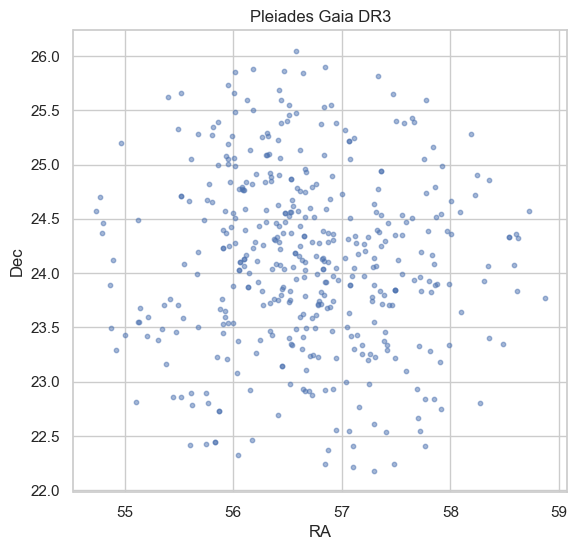

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Pleiades Gaia DR3")  
plt.xlabel("RA")
plt.ylabel("Dec")
plt.scatter(df_filtered["ra"], df_filtered["dec"], s=10, alpha=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

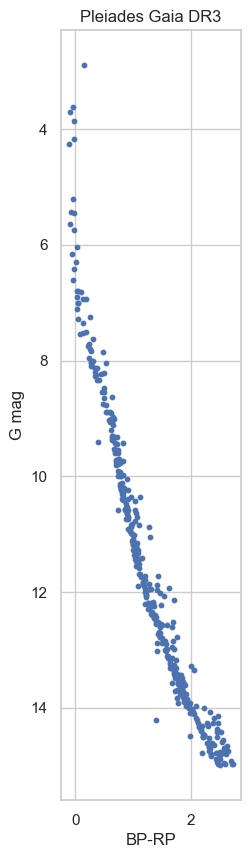

In [34]:
plt.figure(figsize=(10, 10))
plt.title("Pleiades Gaia DR3")  
plt.xlabel("BP-RP")
plt.ylabel("G mag")
plt.scatter(df_filtered["bp_rp"], df_filtered["phot_g_mean_mag"], s=10)
plt.gca().set_aspect("equal", adjustable="box")
plt.gca().invert_yaxis()
plt.show()

In [36]:
df_filtered.to_csv(
    os.path.join("DATA/Pleiades_Chulkov_filtered_Gaia_DR3.csv"),
    index=False,
)